# 04 - Model Evaluation & Comparison 
M·ª•c ti√™u:
- ƒê√°nh gi√° chi ti·∫øt t·ª´ng m√¥ h√¨nh h·ªçc m√°y
- V·∫Ω bi·ªÉu ƒë·ªì tr·ª±c quan
- T·ªïng h·ª£p b·∫£ng so s√°nh c√°c m√¥ h√¨nh


## 4.1: Import th∆∞ vi·ªán

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, RocCurveDisplay
)
import joblib


## 4.2:  Load d·ªØ li·ªáu v√† m√¥ h√¨nh

In [2]:
# Load d·ªØ li·ªáu test
X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv").squeeze()

# Load c√°c m√¥ h√¨nh
rf_model = joblib.load("../models/best_rf_model.pkl")
lgbm_model = joblib.load("../models/best_lgbm_model.pkl")
nn_model = joblib.load("../models/best_mlp_model.pkl")
stack_model = joblib.load("../models/stacking_model.pkl")

## 4.3: H√†m ti·ªán √≠ch ƒë√°nh gi√° nhanh

In [3]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f" {name}")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {pre:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    print("-" * 30)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    
    return {'Model': name, 'Accuracy': acc, 'Precision': pre, 'Recall': rec, 'F1': f1}



## 4.4: ƒê√°nh gi√° t·ª´ng m√¥ h√¨nh v√† v·∫Ω bi·ªÉu ƒë·ªì Confusion Matrix

 Random Forest
Accuracy:  0.8563
Precision: 0.8966
Recall:    0.8928
F1-score:  0.8947
------------------------------


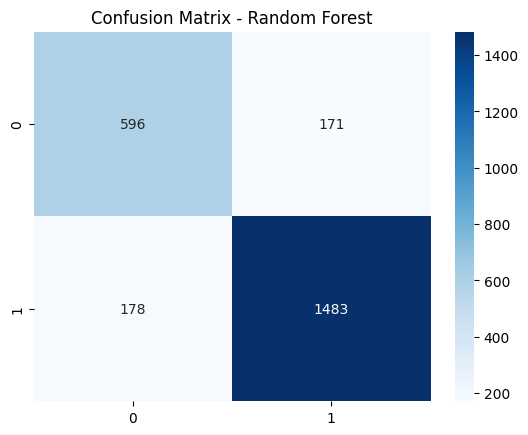

 LightGBM
Accuracy:  0.8563
Precision: 0.8868
Recall:    0.9055
F1-score:  0.8960
------------------------------


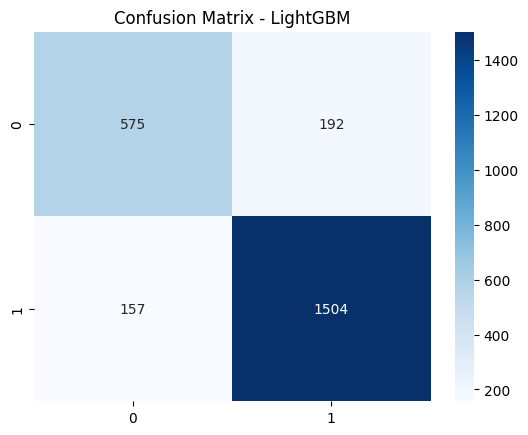

 Neural Network
Accuracy:  0.8373
Precision: 0.9148
Recall:    0.8405
F1-score:  0.8761
------------------------------


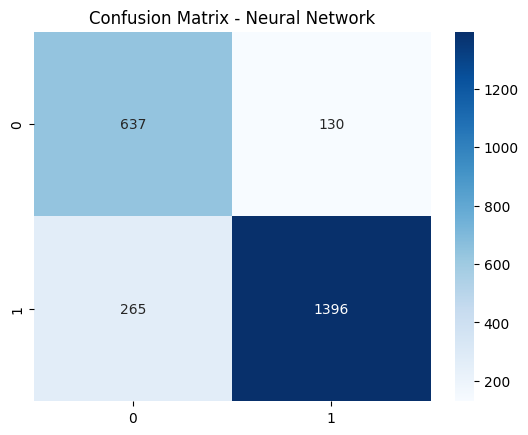

 Stacking
Accuracy:  0.8567
Precision: 0.8892
Recall:    0.9031
F1-score:  0.8961
------------------------------


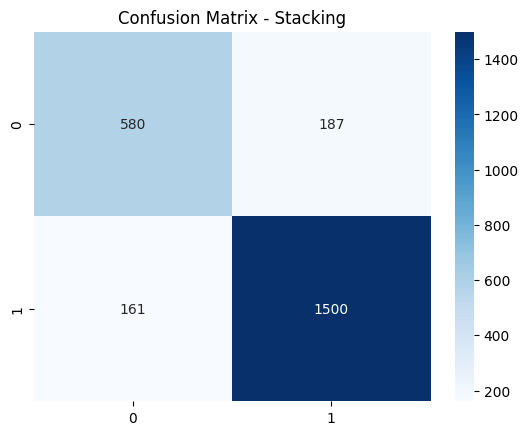

In [4]:
# # Random Forest
# y_pred_rf = evaluate_model("Random Forest", rf_model, X_test, y_test)

# # LightGBM
# y_pred_lgbm = evaluate_model("LightGBM", lgbm_model, X_test, y_test)

# # Neural Network
# y_pred_nn = evaluate_model("Neural Network (MLP)", nn_model, X_test, y_test)
results = []

results.append(evaluate_model("Random Forest", rf_model, X_test, y_test))
results.append(evaluate_model("LightGBM", lgbm_model, X_test, y_test))
results.append(evaluate_model("Neural Network", nn_model, X_test, y_test))
results.append(evaluate_model("Stacking", stack_model, X_test, y_test))

results_df = pd.DataFrame(results)

## 4.5: V·∫Ω ROC Curve

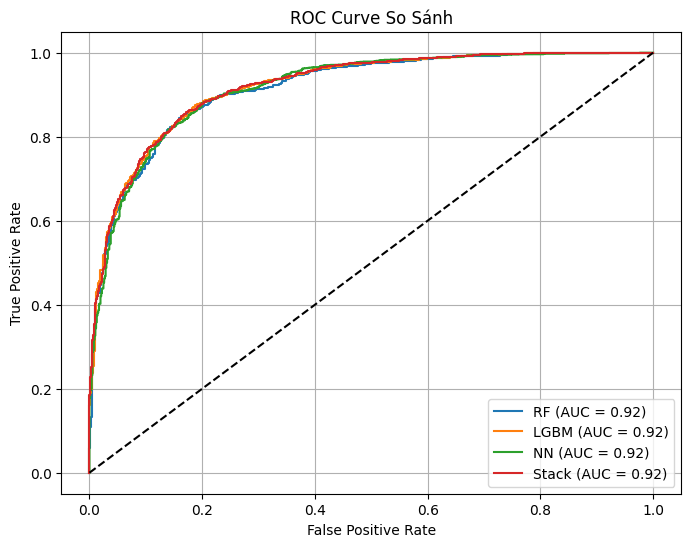

In [5]:
# def plot_roc_curve(model, X_test, y_test, model_name):
#     y_score = model.predict_proba(X_test)[:,1]
#     fpr, tpr, thresholds = roc_curve(y_test, y_score)
#     roc_auc = auc(fpr, tpr)
    
#     plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# plt.figure(figsize=(8,6))
# plot_roc_curve(rf_model, X_test, y_test, "Random Forest")
# plot_roc_curve(lgbm_model, X_test, y_test, "LightGBM")
# plot_roc_curve(nn_model, X_test, y_test, "Neural Network (MLP)")
# plt.plot([0,1],[0,1],'k--')
# plt.title("ROC Curve Comparison")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.legend(loc='lower right')
# plt.grid()
# plt.show()
plt.figure(figsize=(8, 6))

for name, model in zip(['RF', 'LGBM', 'NN','Stack'], [rf_model, lgbm_model, nn_model,stack_model]):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve So S√°nh")
plt.legend()
plt.grid(True)
plt.show()



## 4.6: B·∫£ng so s√°nh m√¥ h√¨nh

In [6]:
print("üìä So s√°nh hi·ªáu su·∫•t m√¥ h√¨nh:")
display(results_df.sort_values(by="F1", ascending=False))

üìä So s√°nh hi·ªáu su·∫•t m√¥ h√¨nh:


Model  Accuracy  Precision    Recall        F1
3        Stacking  0.856672   0.889152  0.903070  0.896057
1        LightGBM  0.856260   0.886792  0.905479  0.896038
0   Random Forest  0.856260   0.896614  0.892836  0.894721
2  Neural Network  0.837315   0.914810  0.840458  0.876059